# Исследование объявлений о продаже квартир

## Описание проекта:

На основе архивных данных (*архив объявлений о продаже квартир* в Санкт-Петербурге и соседних населённых пунктах за несколько лет) из сервиса Яндекс.Недвижимость, **нужно** научиться **определять рыночную стоимость** объектов недвижимости. **Задача** - установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой **квартире** на продажу **доступны два вида данных**:
1. Вписаны пользователем
2. Получены автоматически на основе картографических данных. 

Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


## Исходные данные и их описание: 

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Основной проект

### Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import datetime 

import warnings
warnings.filterwarnings("ignore") 

# Yandex server
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')                                                                                

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
print('General information about data')
df.info();
print('\n', '*' * 20, '\n')

print('Columns:', df.columns)
print('\n', '*' * 20, '\n')

print('NaN values: \n', df.isnull().sum())
print('\n', '*' * 20, '\n')

print('Duplicates:', df.duplicated().sum())
print('\n', '*' * 20, '\n')


General information about data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 n

#### Предварительные выводы:

* Все в порядке и дополнительных действий не требуется. Столбцы:  **total_images**, **total_area**, **rooms**, **floor**, **studio**, **open_plan**;

* Требуется изменить формат данных. Столбцы: **first_day_exposition**, **last_price**

* В данных есть пропуски. Столбцы: **floors_total**, **living_area**, **ceiling_height**, **kitchen_area**, **balcony**, **locality_name**, **is_apartment**, **airports_nearest**, **cityCenters_nearest**, **parks_around3000**, **parks_nearest**, **ponds_around3000**, **ponds_nearest**, **days_exposition** 

### Заполняем пропуски 

#### Простые случаи

In [3]:
column_list = ['last_price'  , 'first_day_exposition', 'locality_name',
               'balcony'     , 'parks_around3000'    , 'parks_nearest',
               'is_apartment', 'ponds_around3000'    , 'ponds_nearest']

for col in column_list:
    if col == 'last_price':
        df[col] = df[col].astype('int64')
    elif col == 'first_day_exposition':
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%dT%H:%M:%S').dt.round('D')
    elif col == 'locality_name':
        df[col] = df[col].replace(np.nan, 'unknown')
    elif col in ['balcony', 'parks_around3000', 'ponds_around3000']:
        df[col] = df[col].replace(np.nan, 0).astype('int64')        
    elif col == 'is_apartment': 
        df[col] = df[col].replace(np.nan, False)
    else:
        df[col] = df[col].astype('Int64')
        #df[col] = df[col].replace(np.nan, -9999).astype('int64')



#### Заполнение пропусков в зависимости от одной переменной

Для заполнения пропусков в следующих стобцах, я хочу использовать стобец **locality_name**, посмотрю уникальные значения

In [4]:
print(df['locality_name'].unique(), '\n')

print(df['locality_name'].value_counts().head(20))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

После просмотра уникальных значений можно сделать выводы: 
1. Есть неявные дубликаты например:
    1. Слово поселок записано по разному (поселок и посёлок). Заменю ё на е.
    2. Есть два варианта записи: 'деревня Кудрово' u 'Кудрово' оставлю только один вариант.

2. В зону покрытия данных попадают данные почти из всей Ленинградской области,что создает довольно-таки большой перечень названий и если просто использовать данную колонку для заполнения пропусков, то нам неудасться полностью  избавится от пропусков в столбцах **airports_nearest**, **cityCenters_nearest**, **ceiling_height**, **floors_total**.


3. Тем не менее, можно создать дополнительный стобец, где будет представлены категории:
    1. Санкт-Петербург - **Категория 1**
    2. Близлежащие пригороды и поселки (25 - 70 km от Питера): - **Категория 2**
        1. посёлок Мурино;
        2. посёлок Шушары;
        3. Пушкин;
        4. Колпино;
        5. посёлок Парголово;
        6. Гатчина;
        7. деревня Кудрово;
        8. Петергоф;
        9. Сестрорецк;
        10. Красное Село;
        11. деревня Новое Девяткино;
        12. Сертолово;
        13. Ломоносов;
        
    3. Крупные города Ленинградской области: - **Категория 3**
        1. Выборг
        2. Кириши
        3. Сланцы 
        4. Волхов
        5. Кингисепп
        6. Тосно
        7. Никольское
        8. Кронштадт
        9. Никольское
        10. Павловск
    4. Поселки и деревни Ленинградской области: --> **Категория 4**
        
<font color='orange'>Данное разделение позволит решить ряд вопросов:</font> 
* В поселках и деревнях, встречаются в основном дома с низкой высотностью и скорее всего со стандратной высотой потолков;
* Да, точно определить расстояние до аэропорта и ближайшего центра города не получится, но это лучше чем пропуски. Данную проблему можно решить более детальным анализом расстояний, каждого поселка и т.д, но на это не времени. Но в целом проблему можно решить;

In [5]:
df['locality_name'] = df['locality_name'].str.replace("ё", "е", regex=False)
df['locality_name'] = df['locality_name'].replace('деревня Кудрово', 'Кудрово')

In [6]:
def location(row):
    name = row['locality_name']
    
    kat_1 = ['Санкт-Петербург']
    
    kat_2 = ['поселок Мурино', 'поселок Шушары' , 'Всеволожск', 'Пушкин'    , 'Колпино'  , 'поселок Парголово',
             'Гатчина'       , 'Кудрово'        , 'Петергоф'  , 'Сестрорецк', 'Сертолово', 'Красное Село'     ,
             'деревня Новое Девяткино', 'Ломоносов', 'поселок Бугры' , 'Отрадное', 'городской поселок Янино-1' ,
             'деревня Старая', 'поселок Стрельна', 'поселок Тельмана',]
    
    kat_3 = ['Выборг'    , 'Кириши'   , 'Сланцы'    , 'Волхов'  , 'Кингисепп'   , 'Тосно' , 'Сосновый Бор',
             'Никольское', 'Кронштадт', 'Никольское', 'Павловск', 'Ивангород'   , 'Тихвин', 'Коммунар'    ,
             'Кировск'   , 'Приозерск', 'поселок Металлострой ' , 'Шлиссельбург']
    
    if name in kat_1:
        return 1
    elif name in kat_2:
        return 2
    elif name in kat_3:
        return 3
    else:
        return 4

df['location'] = df.apply(location, axis = 1)

In [7]:
def one_pred(data, column):
    for group_dist in data['location'].unique():
        median_value = data.loc[data['location'] == group_dist, column].median()
        #print(group_age, median_value)
        data.loc[(data[column].isna()) & (data['location'] == group_dist), column] = median_value    
    return data


column_list = ['ceiling_height'  , 'floors_total',
               'airports_nearest', 'cityCenters_nearest' ]

for col in column_list:
    df = one_pred(df, col)
    if col in ['floors_total', 'airports_nearest', 'cityCenters_nearest']:
        df[col] = df[col].astype('int64')
    

#### Заполнение пропусков сложные случаи

Для заполнения следующих пропусков хочу использовать столбец **total_area**. Нужно создать категории в зависимости от размера квартиры.

In [8]:
df['new_total_area'] = pd.cut(df['total_area'], [0, 25, 50, 75, 100, np.inf], 
                              labels = ['0-25', '25-50', '50-75', '75-100','>100'])

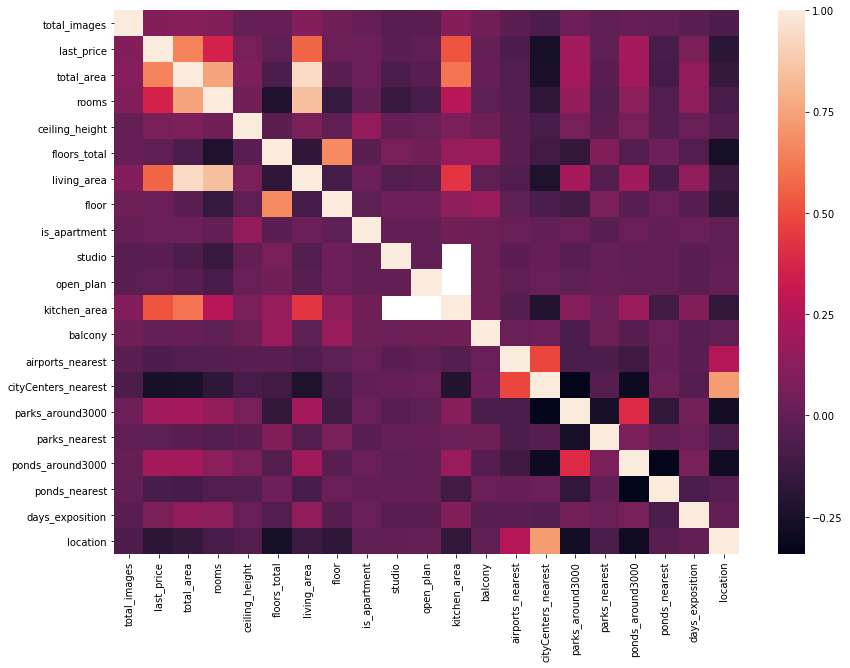

In [9]:
correlation = df.corr()

fig = plt.figure(figsize = (14,10))
ax  = fig.add_subplot(111)   
ax  = sns.heatmap(correlation)

In [10]:
df['living_area'] = df.groupby(['rooms','new_total_area'])['living_area'].apply(lambda x: x.fillna(x.median()))

df['kitchen_area'] = df.groupby(['new_total_area'])['kitchen_area'].apply(lambda x: x.fillna(x.median()))

warnings.simplefilter("ignore", category=RuntimeWarning) # скрыл warning

Для заполнения следующих пропусков хочу использовать столбец **last_price**. Нужно создать категории в зависимости от стоимости квартиры.

In [11]:
df['new_price'] = pd.cut(df['last_price'], [0, 35e5, 70e5, 15e6, 35e6, np.inf], 
                              labels = ['низкая', 'ниже среднего', 'средняя', 'выше среднего','элитная'])

Из описания набора данных (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет) я делаю предположение, что на данный момент объявления не активны, архив закрыт. Квартиры, которые имеют в столбце 'days_exposition' значение NaN на момент закрытия архива по прежнему оставались непроданными. В связи с этим основная задача заключается в поиске даты закрытия архива.

In [12]:
# Найду дату когда были выложены последние объявления
last_data = df['first_day_exposition'].max()
last_data

Timestamp('2019-05-03 00:00:00')

Теперь я знаю, что последние объявления были добавлены на сайт в 3 мая 2019 года. И можно было бы считать, эту дату последним днем перед закрытием архива. Но я хочу проверить, нету ли квартир, которые были проданы позднее 3 мая 2019 года. Если такие данные есть, то последний день и можно считать датой закрытия архива.

In [13]:
# Сделаю выборку по всем дням
year = 2019
months = [1, 2, 3, 4, 5]
data = []

for month in months:
    days = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
    
    if (month == 1) or (month == 3) or (month == 5):
        last_day = [28,29,30,31]    
    elif month == 2:
        last_day = [28]       
    elif month == 4:
        last_day = [28,29,30]  
    
    days = days + last_day
    #print (len(days))
    
    for day in days:
        current_day = f'{year}-{month}-{day}'
        data.append(current_day)

# Data series with days
our_series = pd.Series(data)

# Get data from each day
df_data = df.query('first_day_exposition in @our_series')
#print(len(df_data))

# Sort values to get max values in field days_exposition
display(df_data.sort_values('days_exposition', ascending=False).head(5))

# Delete NaN values - they are not intersting
df_data = df_data.query('days_exposition != "NaN"')
#print(len(df_data))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,location,new_total_area,new_price
22941,8,10965000,69.3,2019-01-10,1,3.00,4,48.9,4,True,...,73391,54490,3,4,1,217,110.0,4,50-75,средняя
7323,10,1400000,62.0,2019-01-11,3,2.55,4,44.0,2,False,...,26128,27742,0,NaN,0,NaN,109.0,4,50-75,низкая
14131,7,5050000,63.0,2019-01-12,3,2.53,12,40.7,3,False,...,32066,12658,0,NaN,0,NaN,108.0,1,50-75,ниже среднего
4331,14,3250000,59.1,2019-01-11,3,2.50,5,44.0,2,False,...,66669,48395,0,NaN,0,NaN,107.0,3,50-75,низкая
9773,9,1100000,45.0,2019-01-07,2,2.55,5,30.0,1,False,...,26128,27742,0,NaN,0,NaN,103.0,4,25-50,низкая


Я нашел, что в 2019 году объявление о продаже квартиры было опубликовано 2019-01-10. Объявление было акутальным 110 дней. Я считаю, что через 110 дней квартира продалась или объявление стало не актуальным. Теперь осталось получить даты на момент продажи квартир и определить последний день.

In [14]:
def get_date(row):
    first_day = row['first_day_exposition'] 
    period    = row['days_exposition']
    new_date  = first_day + datetime.timedelta(period)
    
    return new_date

df_data['last_date'] = df_data.apply(get_date, axis = 1)

df_data.sort_values('last_date', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,location,new_total_area,new_price,last_date
2547,0,2550000,43.0,2019-03-30,2,3.00,2,26.0,1,False,...,48395,0,NaN,0,NaN,33.0,3,25-50,низкая,2019-05-02
10887,14,4750000,47.0,2019-04-02,2,2.60,5,28.0,3,False,...,8302,0,NaN,0,NaN,30.0,1,25-50,ниже среднего,2019-05-02
7594,20,4950000,51.3,2019-02-25,1,2.72,16,19.8,12,False,...,11308,0,NaN,1,544,66.0,1,50-75,ниже среднего,2019-05-02
21070,12,4325000,32.6,2019-04-16,1,2.70,26,16.1,8,False,...,13354,0,NaN,0,NaN,16.0,1,25-50,ниже среднего,2019-05-02
22464,8,2230000,41.0,2019-03-18,1,2.50,12,17.5,9,False,...,48395,0,NaN,0,NaN,45.0,3,25-50,низкая,2019-05-02


В результате манипуляция я узнал, что 3 мая 2019 года можно считать днем архивации. Заполняем пропуски.

In [15]:
def days_correction(data, col):
    delta = (data[col].max() - data[col]).dt.days
    data.loc[(data['days_exposition'].isna()), 'days_exposition'] = delta
    
    return data


df = days_correction(df, 'first_day_exposition')
df['days_exposition'] = df['days_exposition'].astype('int64')

Делаем еще раз проверку на наличие пропусков и тип данных

In [16]:
print('General information about data')
df.info();
print('\n', '*' * 20, '\n')

print('NaN values: \n', df.isnull().sum())
print('\n', '*' * 20, '\n')

General information about data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23698 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-nu

Есть один пропуск в стобце **living_area** удалю его по индексу. На пропуски в столбцах **parks_nearest** и **ponds_nearest** можно не обращать особого внимания.

In [17]:
# Определю индекс строк
index_del_rows = (df.loc[df['living_area'].isna()])
index_del_rows

# Удаляю по индексу строки и делаю переиндексирование
for index in range(len(index_del_rows)):
    df = df.drop(labels = [19392], axis=0).reset_index(drop=True) 

In [18]:
print('NaN values: \n', df.isnull().sum())
print('\n', '*' * 20, '\n')

NaN values: 
 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
location                    0
new_total_area              0
new_price                   0
dtype: int64

 ******************** 



Пропусков и дубликатов больше нет. К основным причинам пропусков я бы отнес:
1. Наличие необъязательных поле при заполнении специальной формы для подачи объявлений. 
2. Возможно человек счел, что информация непредставляет особого интереса и решил ее не предоставлять. 

Приступаю к следующему этапу

### Расчет и добавление данных в таблицу


#### Цена квадратного метра;

Формула расчета стоимости квадратного метра:
\begin{align}
    СТМ = \frac{СТ}{ПЛ} \label{eq1}\tag{1}
\end{align}
<br>  

где: **СТМ** - стоимость квадратного метра в руб/м2; **СТ** - стоимость объекта недвижимости в рублях; **ПЛ** - площадь объекта недвижимости в кв. метрах.


In [19]:
df['price_meter'] = (df['last_price'] / df['total_area']).astype('int') 


#### Год, месяц, день

In [20]:
df['year']  = pd.DatetimeIndex(df['first_day_exposition']).year
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['day']   = pd.DatetimeIndex(df['first_day_exposition']).day

#### Этаж квартиры

In [21]:
def get_floor(row):
    # First and last floor
    FIRST_FLOOR = 1
    tot_floor   = row['floors_total']
    
    # Current flor
    cur_floor = row['floor']
    
    # Get category  
    if cur_floor == FIRST_FLOOR:
        return 'первый'
    elif cur_floor == tot_floor:
        return 'последний'
    else:
        return 'другой'
    
# Get floor category:   
df['floor_cat'] = df.apply(get_floor, axis = 1)               

#### Соотношение площадей

In [22]:
# соотношение жилой и общей площади
df['live_ratio'] = df['living_area'] / df['total_area'] 

In [23]:
# соотношение площади кухни к общей площади
df['kitchen_ration'] = df['kitchen_area'] / df['total_area'] 

## Исследовательский анализ данных

In [24]:
def histogram(df, col, bin):
    df.plot(y = col      , title = col,
            kind = 'hist', bins  = bin,
            grid = True  )

def boxplots(df, col):
    df.plot(y = col     , title = col, 
            kind = 'box', grid = True)  

### Гистограммы и первичный анализ данных

total_area 
 count    23698.000000
mean        60.335542
std         35.597678
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64


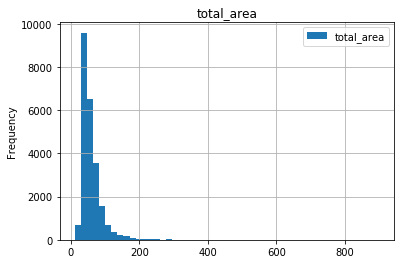

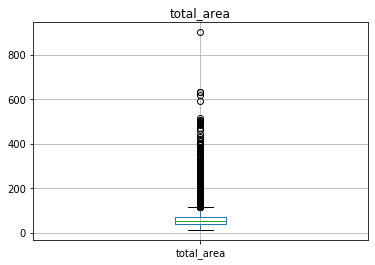

In [25]:
col_list = ['total_area', 'price_meter', 'rooms', 'ceiling_height']


plot1 = histogram(df, 'total_area', 50)
plot2 = boxplots(df, 'total_area')
stat = df['total_area'].describe()
print(f'total_area \n', stat)

rooms 
 count    23698.000000
mean         2.070723
std          1.078344
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


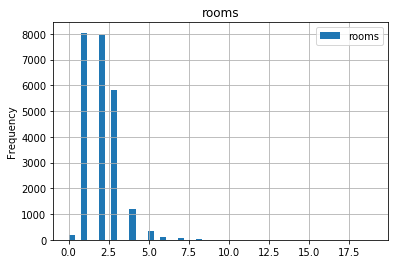

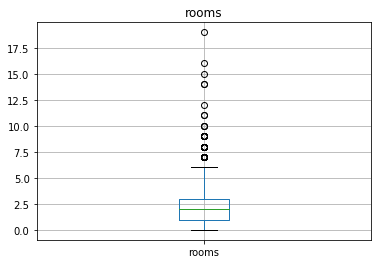

In [26]:
plot1 = histogram(df, 'rooms', 50)
plot2 = boxplots(df, 'rooms')
stat = df['rooms'].describe()
print(f'rooms \n', stat)

ceiling_height 
 count    23698.00000
mean         2.72407
std          0.98923
min          1.00000
25%          2.55000
50%          2.70000
75%          2.70000
max        100.00000
Name: ceiling_height, dtype: float64


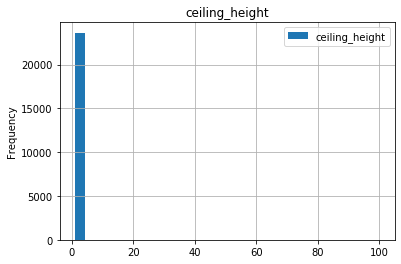

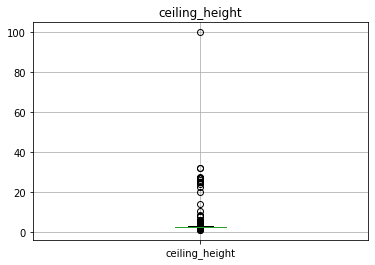

In [27]:
plot1 = histogram(df, 'ceiling_height', 30)
plot2 = boxplots(df, 'ceiling_height')
stat = df['ceiling_height'].describe()
print(f'ceiling_height \n', stat)

Вместо столбца **last_price** лучше использовать стобце **price_meter**, который также отображается стоимость квартиры, но при этом дисперсия данного ряда, будет меньше. 

price_meter 
 count    2.369800e+04
mean     9.941733e+04
std      5.030432e+04
min      1.110000e+02
25%      7.658450e+04
50%      9.500000e+04
75%      1.142515e+05
max      1.907500e+06
Name: price_meter, dtype: float64


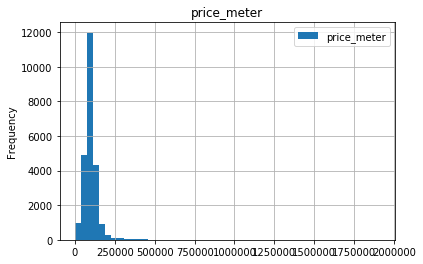

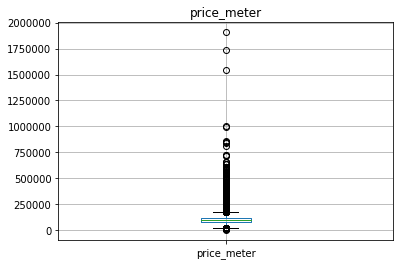

In [28]:
plot1 = histogram(df, 'price_meter', 50)
plot2 = boxplots(df, 'price_meter')
stat = df['price_meter'].describe()
print(f'price_meter \n', stat)

**Выводы:** 
1. В стобце **total_area** есть объекты недвижимости с очень большой площадью, что по сути является выбросами.
2. В стобце **room** есть объекты недвижимости с 15 и более комнатами, все возможно, но странно. 
3. В стобце **ceiling_height** есть объекты недвижости с высотой потолков 100 метров и меньше 2.5 метров. Скорее всего это ошибки.
4. В стобце  **price_meter** есть очень дорогие объекты невижимости, которые выбиваются из наших данных.


### Более детальный анализ выбросов

Исходя из цели задания, все объекты невижимости, которые выбиваются из за рамки допустимого диапазона, являются выбросами, но такли это на самом деле? Может быть в данных есть опечатки или же это реальные данные без ошибок?

Сразу предположу, что значения в стобцах **room** и **ceiling_height** я не буду анализировать более детально. Поскольку высота потолков 100 метров, это явная ошибка. В случае, если высота потолков находится в диапазоне от 40 до 99 метров, исправить как-то такие данные тоже не предстовляется возможным. Аналогичная ситуация с комнатами. Описательная статистика показывает, что 6 комнат, является крайней границе нашего диапазона размаха. Соответственно данные с 7 и более комнатами будут удалены из исследовательского датасета. 

 
Столбцы **total_area**, **price_meter** и **last_price** тесно связаны друг с другом (коэффициент корреляции больше 0.65), поэтому попытаюсь более детально разобраться в данных прежде, чем их откинуть.

In [30]:
# Get correlation coefficients
print(df['last_price'].corr(df['total_area']))
print(df['last_price'].corr(df['price_meter']))

0.6530273988435453
0.7366390259841762


In [31]:
# Get data
df_bad_data = df.query('total_area > 200')
print(len(df_bad_data))
df_bad_data.head(20)

226


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,location,new_total_area,new_price,price_meter,year,month,day,floor_cat,live_ratio,kitchen_ration
155,8,96000000,317.0,2017-07-07,4,3.50,3,183.000,3,False,...,1,>100,элитная,302839,2017,7,7,последний,0.577287,0.053628
464,15,66571000,280.3,2015-06-11,6,5.20,8,159.500,7,False,...,1,>100,элитная,237499,2015,6,11,другой,0.569033,0.075276
492,18,95000000,216.0,2017-12-05,4,3.00,5,86.000,4,False,...,1,>100,элитная,439814,2017,12,5,другой,0.398148,0.356481
509,5,90000000,225.0,2016-06-26,6,2.70,4,134.000,2,False,...,1,>100,элитная,400000,2016,6,26,другой,0.595556,0.086667
521,20,25717300,230.1,2015-01-21,3,2.60,3,130.000,1,False,...,2,>100,выше среднего,111765,2015,1,21,первый,0.564972,0.113429
581,20,65000000,365.0,2019-03-18,7,2.90,7,145.000,7,False,...,1,>100,элитная,178082,2019,3,18,последний,0.397260,0.046575
660,3,49950000,483.9,2017-10-04,7,3.20,6,312.500,4,False,...,1,>100,элитная,103223,2017,10,4,другой,0.645795,0.054557
681,20,24900000,249.0,2015-08-13,7,2.70,5,180.000,4,False,...,1,>100,выше среднего,100000,2015,8,13,другой,0.722892,0.068273
793,20,135000000,310.0,2018-05-22,4,3.30,5,250.000,2,False,...,1,>100,элитная,435483,2018,5,22,другой,0.806452,0.161290
813,7,16500000,229.0,2016-02-25,8,2.70,6,160.000,5,False,...,1,>100,выше среднего,72052,2016,2,25,другой,0.698690,0.109170


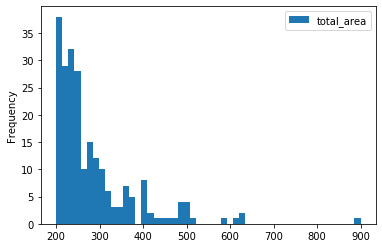

In [32]:
df_bad_data.plot(y = 'total_area', kind = 'hist', bins = (50))

In [33]:
def delta_area(row):
    # First and last floor
    tot_area = row['total_area']
    liv_area = row['living_area']
    delta = tot_area - liv_area
    return delta
    
# Get floor category:   
df_bad_data['delta_area'] = df_bad_data.apply(delta_area, axis = 1)  
df_bad_data

warnings.simplefilter("ignore", category=RuntimeWarning) # скрыл warning # скрыл warning

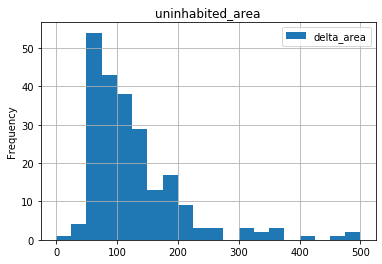

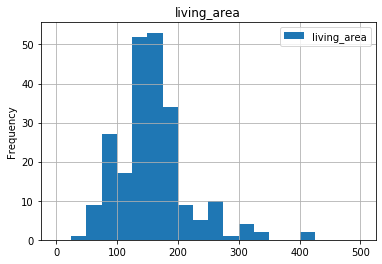

In [34]:
df_bad_data.plot(y = 'delta_area' , title = 'uninhabited_area' , kind = 'hist',
                 bins = (20), range = (0, 500), grid = True);
df_bad_data.plot(y = 'living_area', title = 'living_area', kind = 'hist', 
                 bins = (20), range = (0, 500), grid = True);


**Вывод:** К сожалению, исправить даже такие данные весьма сложно. Посмотрев, набор данных со значениями в стобце **total_area**, можно отметить, что по цене за квадратный метр, такие квартиры особо не выделяются среди похожих объявлений. Более того, большинство квартир из данного сегмента попадают в подкатерогию элитного жилья. 

Изучив более подробно данные, я пришел к выводу, что скорее всего это реалистичная площадь, которая складывается из двух факторов, жилая и нежилая площадь. Скорее всего у таких квартир, есть подземные паркинги, большие балконы или какая-то небольшая придомовая территория.  В связи с этим, я принимаю решение не продолжать дальнейший анализ выбивающихся значений по площади.

### Время продажи квартиры.

days_exposition 
 count    23698.000000
mean       185.825766
std        233.384971
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64


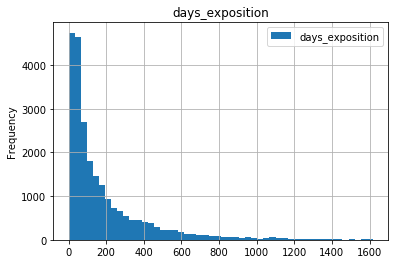

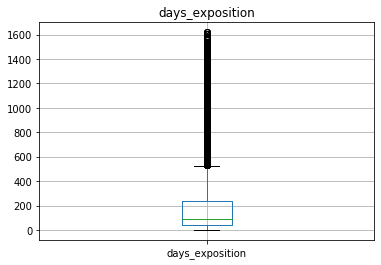

In [35]:
plot1 = histogram(df, 'days_exposition', 50)
plot2 = boxplots(df, 'days_exposition')
stat = df['days_exposition'].describe()
print(f'days_exposition \n', stat)

In [36]:
df_corr = df.corr(method ='pearson')

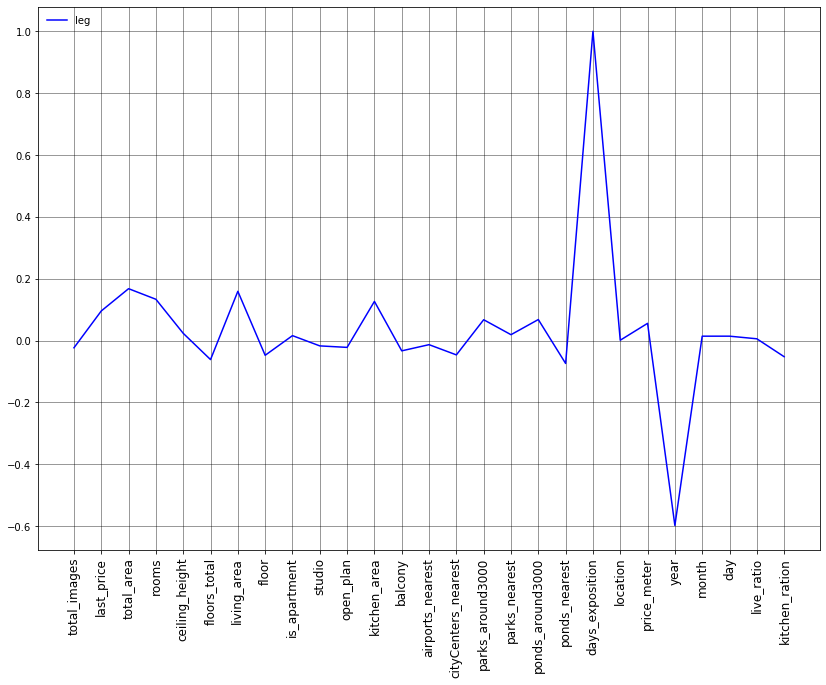

In [37]:
fig = plt.figure(figsize = (14,10))
ax  = fig.add_subplot(111)   

ax.plot(df_corr.index, df_corr['days_exposition'], label = 'leg', color = 'blue' , linestyle = '-')
ax.legend(loc = 'upper left', frameon = False) 

ax.grid(True , which = 'major', color = 'k', linestyle = 'solid', alpha = 0.5)

for label in ax.xaxis.get_ticklabels():
    label.set_color('black')
    label.set_rotation(90)
    label.set_fontsize(12)
    
plt.show()

(1, 250000)

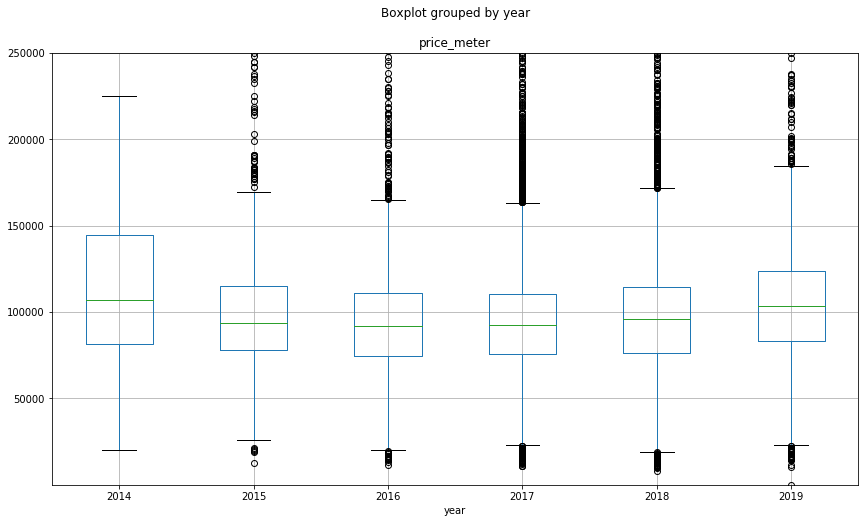

In [38]:
df.boxplot(column = ['price_meter'], by = 'year', figsize = (14,8))
plt.ylim(1, 250000)



**Вывод:** В большинстве случаев, квартиры в Санкт-петербурге и Ленинградской области продаются за 3-4 месяца. Наиболее быстрыми являются продажи, которые произошли в течение 1 месяца. Наиболее долгими, считаются квартиры, которые продавались больше 7 месяцев. Особо выдающиеся квартиры продавались за один день, а некоторые ждали свое очереди, почти 4 года. 

На корреляционном графике хорошо видно, что скорость продаж коррелирует с годом когда было выставлено объявление о продаже. Почему-то в 2019  году, квартиры раскупались быстрее, чем обычно. Кроме того, на скорость продаж оказывает влияние, общая площадь, местноположение, площадь кухни и стоимость одного квадратного метра.


Кроме того, возникает вопрос, изменится ли ситуация после исключения выбросов?

### Делаем "хорошую" выборку

In [39]:
# Создаем новый датафрейм с отфильтроваными значениями
df_good_data = df.query('(rooms <= 6) & ( 2.4 <= ceiling_height <= 2.8) & ( 20 <= total_area < 105) & (25e3 <= price_meter <= 1.8e5)')


rooms 
 count    19283.000000
mean         1.880361
std          0.868999
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


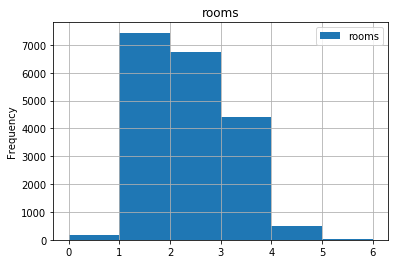

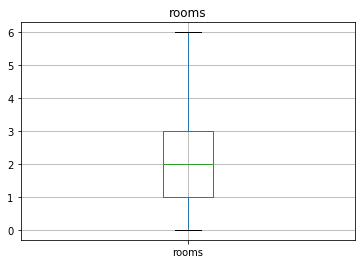

In [40]:
plot1 = histogram(df_good_data, 'rooms', 6)
plot2 = boxplots(df_good_data, 'rooms')
stat = df_good_data['rooms'].describe()
print(f'rooms \n', stat)

**Вывод:** Квартиры со значениями True хорошо согласаются с моим предположением, но вот квартиры False вызывают некоторые вопросы, но пока оставим эти данные, как есть.

ceiling_height 
 count    19283.000000
mean         2.626510
std          0.091523
min          2.400000
25%          2.550000
50%          2.600000
75%          2.700000
max          2.800000
Name: ceiling_height, dtype: float64


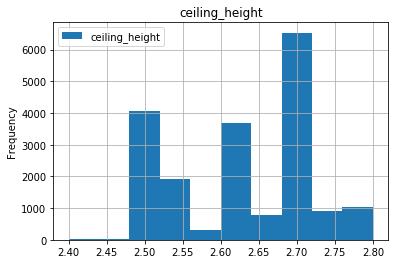

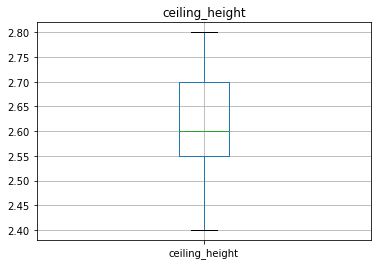

In [41]:
plot1 = histogram(df_good_data, 'ceiling_height', 10)
plot2 = boxplots(df_good_data, 'ceiling_height')
stat = df_good_data['ceiling_height'].describe()
print(f'ceiling_height \n', stat)

**Вывод:** Вроде бы с высотой потолков, тоже разобрались. Высоты 2.5, 2.6 и 2.7 являются самыми стандартными, что и подтверждают данные.

total_area 
 count    19283.000000
mean        51.739022
std         17.130020
min         20.000000
25%         38.200000
50%         47.900000
75%         62.000000
max        104.900000
Name: total_area, dtype: float64


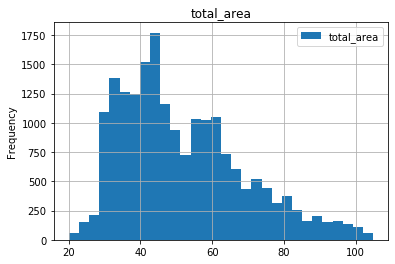

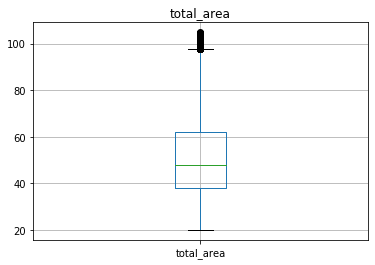

In [42]:
plot1 = histogram(df_good_data, 'total_area', 30)
plot2 = boxplots(df_good_data, 'total_area')
stat = df_good_data['total_area'].describe()
print(f'total_area \n', stat)

**Вывод:** Квартиры с общей площадью 30 - 50 метров, являются самыми распространенными на рынке недвижимости. В целом все ожидаемо.

price_meter 
 count     19283.000000
mean      92108.592906
std       27778.271874
min       25000.000000
25%       74849.500000
50%       92342.000000
75%      108913.000000
max      179980.000000
Name: price_meter, dtype: float64


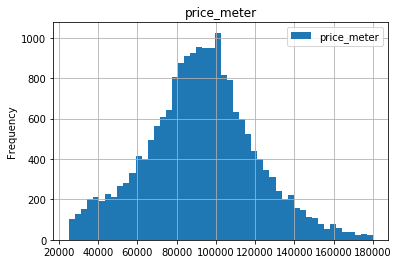

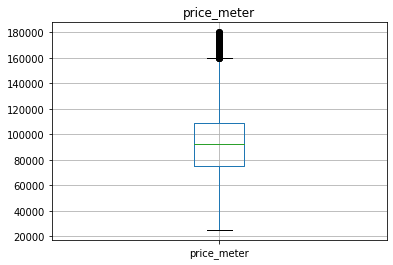

In [43]:
plot1 = histogram(df_good_data, 'price_meter', 50)
plot2 = boxplots(df_good_data, 'price_meter')
stat = df_good_data['price_meter'].describe()
print(f'price_meter \n', stat)

**Вывод:** Наиболее часто на рынке недвижимости встречаются квартиры со средней стоимость одного квадратного метра в районе 90 - 110 тысяч рублей.

In [44]:
df_good_data = df_good_data.query('0 <= days_exposition <= 265')

days_exposition 
 count    15420.000000
mean        82.639494
std         66.392032
min          0.000000
25%         30.000000
50%         60.000000
75%        123.000000
max        265.000000
Name: days_exposition, dtype: float64


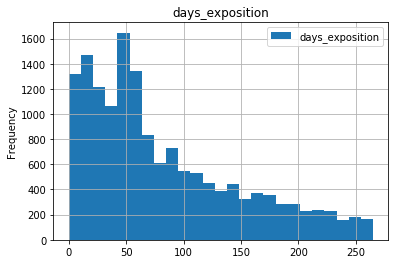

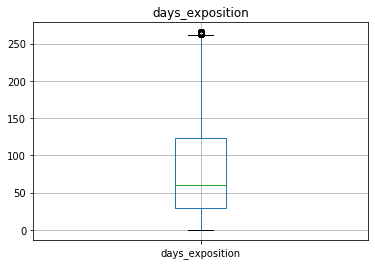

In [45]:
plot1 = histogram(df_good_data, 'days_exposition', 25)
plot2 = boxplots(df_good_data, 'days_exposition')
stat = df_good_data['days_exposition'].describe()
print(f'days_exposition \n', stat)

**Вывод:** В среднем большинство квартир продаются за 75 - 100 дней. При этом можно отметить наличие тенденции на понижение. Чем дольше квартира висит, тем меньше шансов, что ее купят.

### Определение факторов

#### Что влияет на скорость продажи u стоимость жилья? 

In [46]:
df_corr = df_good_data.corr(method ='pearson')

data_publ  = df_corr['days_exposition'].drop(labels='days_exposition')
data_price = df_corr['price_meter'].drop(labels='price_meter')

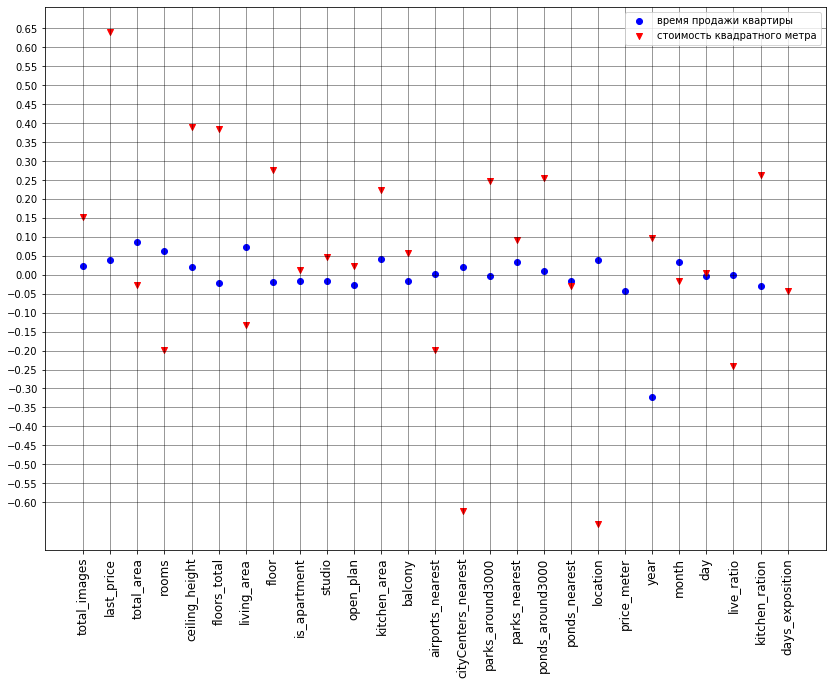

In [47]:
fig = plt.figure(figsize = (14,10))
ax  = fig.add_subplot(111)   


ax.scatter(data_publ.index , data_publ , label = 'время продажи квартиры'     , color = 'blue',  marker='o' )
ax.scatter(data_price.index, data_price, label = 'стоимость квадратного метра', color = 'red' ,  marker='v' )

ax.set_yticks(np.arange(-0.6, 0.7, 0.05))

ax.legend(loc = 'upper right', frameon = True) 

ax.grid(True , which = 'major', color = 'k', linestyle = 'solid', alpha = 0.5)

for label in ax.xaxis.get_ticklabels():
    label.set_color('black')
    label.set_rotation(90)
    label.set_fontsize(12)
    
plt.show()


(1, 250000)

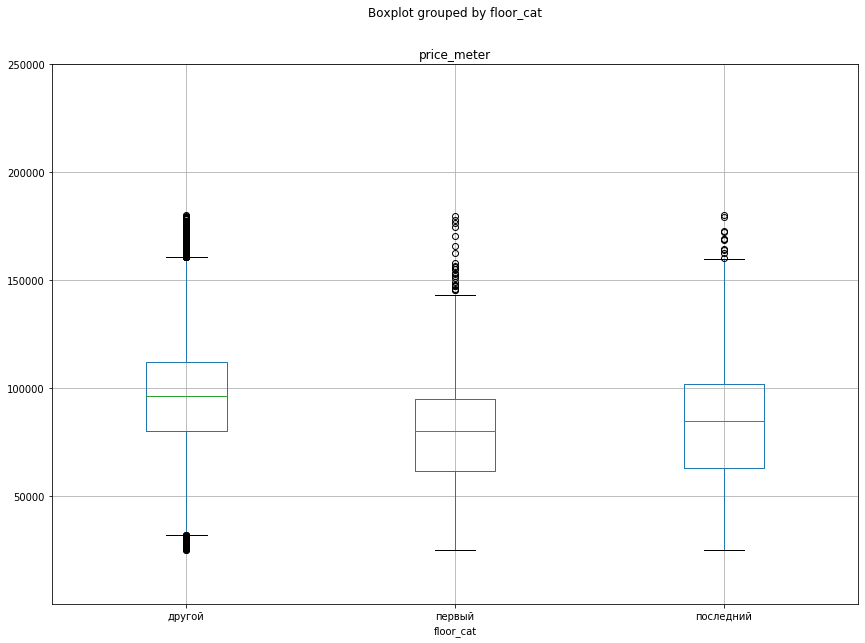

In [48]:
df_good_data.boxplot(column = ['price_meter'], by = 'floor_cat', figsize = (14,10))
plt.ylim(1, 250000)

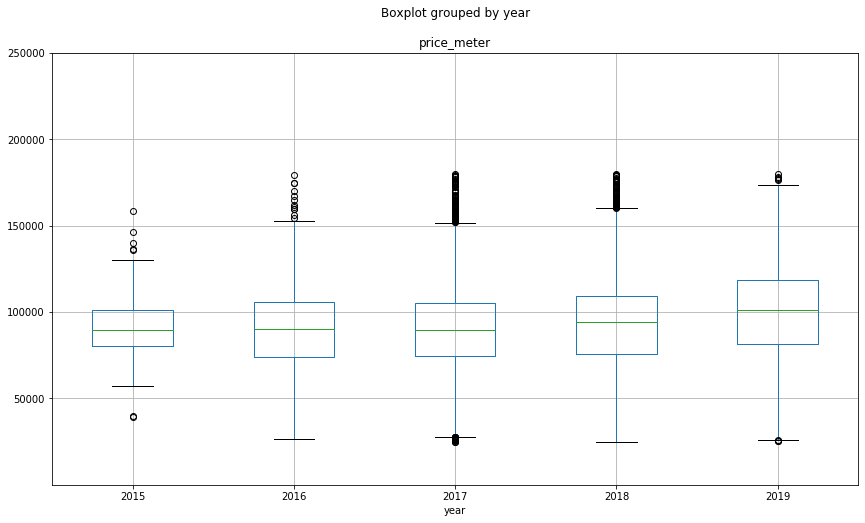

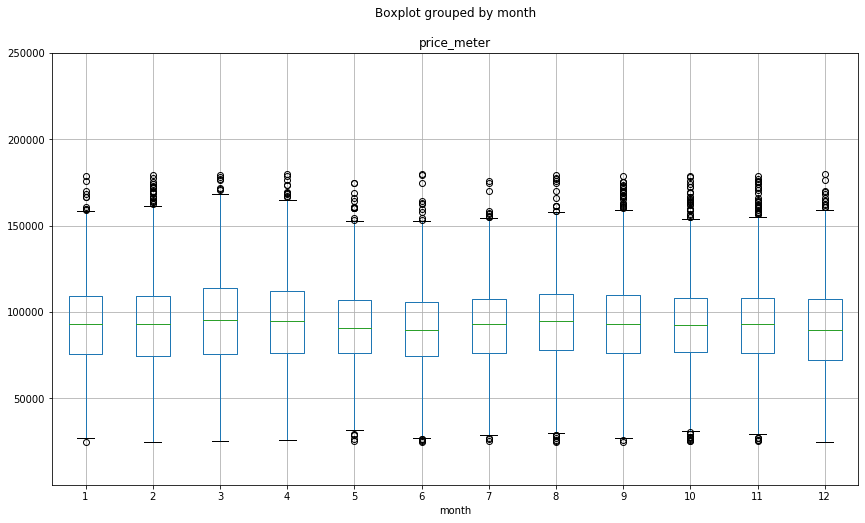

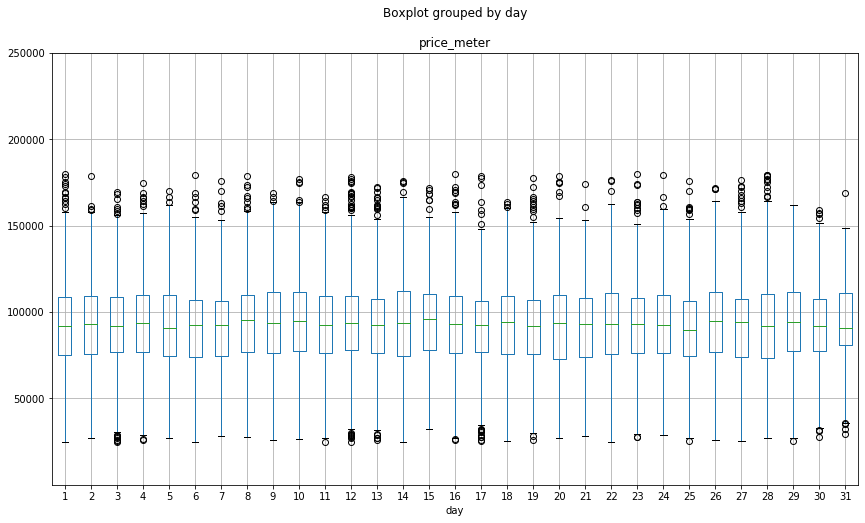

In [49]:
col_list = ['year','month', 'day']

for col in col_list:
    df_good_data.boxplot(column = ['price_meter'], by = col, figsize = (14,8))
    plt.ylim(1, 250000)

**Вывод:** 
1. На скорость продажи квартиры влияет цена, ее площадь и место ее расположения. Кроме того, год когда квартира была выставлена на продажу по прежнему остается важным фактором, но роль данного фактора, существенно снизилась по сравнению с общим набором данных. Наличие парков, озер и близость к центру города, для потенциальных покупателей также играет определенную роль, хотя и не основную. Меньше всего покупатели ориентируются на расстояниe до аэропорта, тип жилья (студия, апартаменты), высоту потолков.


2. На стоимость одного квадратного метра квартиры влияют такие факторы, как общая стоимость жилья, площадь квартиры (в частности, квартиры с большими кухнями стоят дороже). Кроме того на стоимость одного квадратного метра жилья оказывает местоположение квартиры, что отражается на высокой корреляции с такими факторами как наличие парков, озер и расстояния до центра города. Более детальный анализ стоимости квартиры от этажа, расположения квартиры показал, что квартиры напервом этаже в целом стоят дешевле. Любопытно отметить, что что стоимость квартир постепенно растет. 

### Анализ объявлений по населенным пунктам

In [50]:
df_publications = df_good_data.groupby('locality_name').agg({'price_meter':['count','mean']})
df_publications.columns = ['count', 'mean']

print('Топ 10 населенных пунктов с наибольшим количеством объявлений')
display(df_publications.sort_values('count', ascending=False).head(10))

Топ 10 населенных пунктов с наибольшим количеством объявлений


,count,mean
locality_name,,
Санкт-Петербург,9791,105160.195179
поселок Мурино,465,85968.253763
Кудрово,382,96120.005236
поселок Шушары,358,78837.427374
Всеволожск,275,67023.949091
Колпино,269,75512.171004
поселок Парголово,261,89910.670498
Пушкин,233,99994.270386
Гатчина,218,69246.876147


**Вывод:** Больше всего квартир продается в Санкт-Петербурге и близлежащих пригородах, что в целом выглядит весьма логично - крупные населенные пункты с большим количеством жителей. Средняя стоимость квадратного метра в Санкт-Петербурге составляет 103 тысяч рублей.

In [51]:
print('Топ 10 населенных пунктов с наибольшей ценой')
display(df_publications.sort_values('mean', ascending=False).head(10))

print('Топ 10 населенных пунктов с наименьшей ценой')
display(df_publications.sort_values('mean', ascending=False).tail(10))

Топ 10 населенных пунктов с наибольшей ценой


,count,mean
locality_name,,
поселок Лисий Нос,2,113728.000000
деревня Мистолово,6,105249.666667
Санкт-Петербург,9791,105160.195179
Сестрорецк,102,102155.901961
Пушкин,233,99994.270386
Зеленогорск,16,99756.625000
поселок Левашово,1,96997.000000
Кудрово,382,96120.005236
поселок Репино,1,92727.000000


Топ 10 населенных пунктов с наименьшей ценой


,count,mean
locality_name,,
деревня Извара,3,26971.666667
деревня Пчева,1,26829.000000
поселок Каложицы,1,26715.000000
поселок Красная Долина,1,26190.000000
поселок Рабитицы,1,26073.000000
поселок Рябово,1,25874.000000
поселок Платформа 69-й километр,1,25616.000000
деревня Курковицы,1,25606.000000
поселок городского типа Важины,1,25056.000000


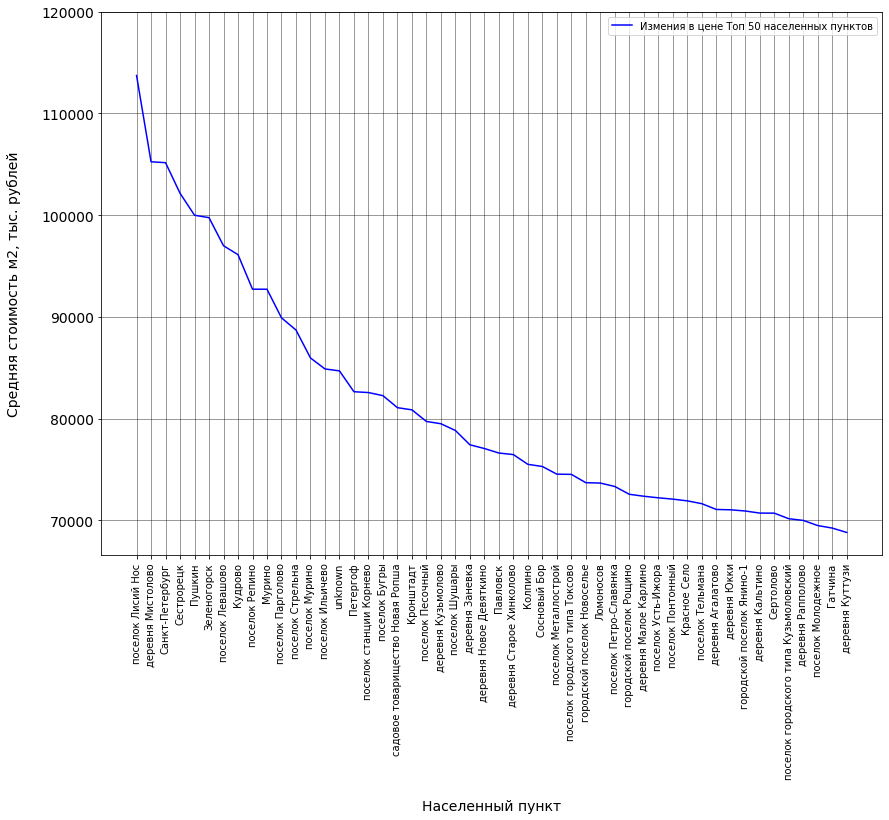

In [52]:
top_10 = df_publications.sort_values('mean', ascending=False).head(50)

fig = plt.figure(figsize = (14,10))
ax  = fig.add_subplot(111)   


ax.plot(top_10.index , top_10['mean'], label = 'Измения в цене Топ 50 населенных пунктов', color = 'blue')

ax.set_yticks(np.arange(70000, 120001, 10000))
#ax.set_xticks(np.arange(0, 31, 2.5))

ax.set_xlabel('Населенный пункт'  , color = 'black', fontsize = 14, labelpad = 20)
ax.set_ylabel('Средняя стоимость м2, тыс. рублей', color = 'black', fontsize = 14, labelpad = 20)

ax.legend(loc = 'upper right', frameon = True) 

ax.grid(True , which = 'major', color = 'k', linestyle = 'solid', alpha = 0.5)

for label in ax.xaxis.get_ticklabels():
    label.set_color('black')
    label.set_rotation(90)
    label.set_fontsize(10)
for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_fontsize(14)    
plt.show()

**Вывод:** Наибольшая средняя цена одно квадратного метра из попавших в выборку значений (106 тысяч рублей) зафиксирована в поселке Лисий Нос. Наименьшая цена зафиксирована в поселок городского типа Кондратьево - там стоимость одного квадратного метра составляет 25 тысяч рублей.

### Анализ расстояний по населенным пунктам

In [53]:
M2KM = 1000

df_distance = df_good_data.query('locality_name == "Санкт-Петербург"')

df_distance['cityCenters_nearest'] = (df_distance['cityCenters_nearest'] / M2KM).round(0)
pd.set_option('chained_assignment', None)

In [54]:
df_km2center = df_distance.groupby('cityCenters_nearest').agg({'price_meter':['mean', 'count']})
df_km2center.columns = ['mean_price', 'count']
df_km2center

,mean_price,count
cityCenters_nearest,,
0.0,99081.500000,2
1.0,123908.942857,35
2.0,117255.568627,51
3.0,114227.900000,80
4.0,119991.786127,173
5.0,122750.130435,207
6.0,124760.128319,226
7.0,120341.821429,168
8.0,115850.852234,291


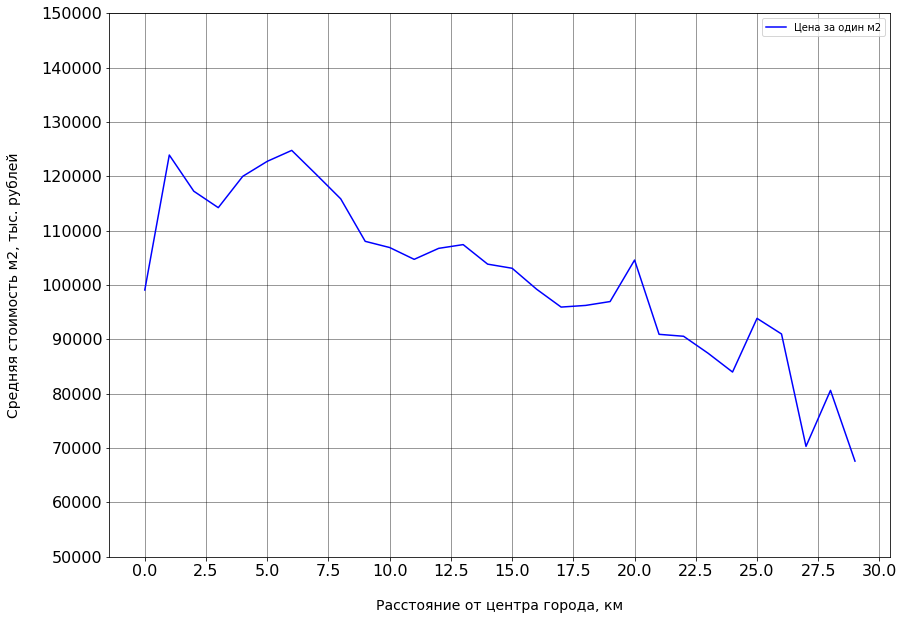

In [55]:
fig = plt.figure(figsize = (14,10))
ax  = fig.add_subplot(111)   


ax.plot(df_km2center.index , df_km2center['mean_price'], label = 'Цена за один м2', color = 'blue')

ax.set_yticks(np.arange(50000, 150001, 10000))
ax.set_xticks(np.arange(0, 31, 2.5))

ax.set_xlabel('Расстояние от центра города, км'  , color = 'black', fontsize = 14, labelpad = 20)
ax.set_ylabel('Средняя стоимость м2, тыс. рублей', color = 'black', fontsize = 14, labelpad = 20)

ax.legend(loc = 'upper right', frameon = True) 

ax.grid(True , which = 'major', color = 'k', linestyle = 'solid', alpha = 0.5)

for label in ax.xaxis.get_ticklabels():
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(16)
for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_fontsize(16)    
plt.show()

**Вывод 1:** В результате фильтрации, в центр города (расстояние меньше 0.5 км) осталась только одна квартира со средней стоимостью 90 тыс. рублей за квадратный метр. Безусловно, такая стоимость явно обусловлена частными особенностями данной квартиры и никак не отображает действительность.




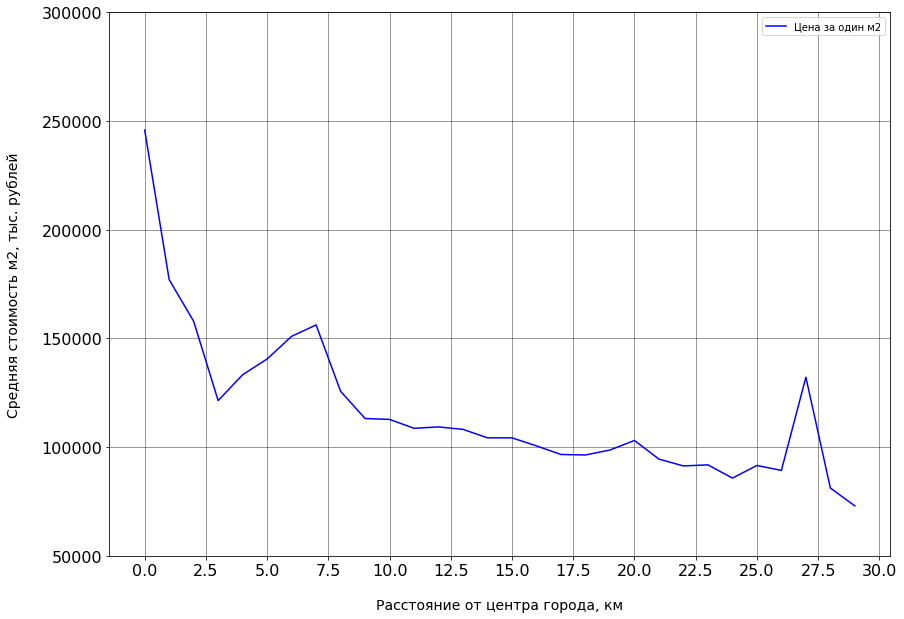

In [56]:
M2KM = 1000

df_distance2 = df.query('locality_name == "Санкт-Петербург"')
df_distance2['cityCenters_nearest'] = (df_distance2['cityCenters_nearest'] / M2KM).round(0)

df_km2center = df_distance2.groupby('cityCenters_nearest').agg({'price_meter':['mean', 'count']})
df_km2center.columns = ['mean_price', 'count']
df_km2center

fig = plt.figure(figsize = (14,10))
ax  = fig.add_subplot(111)   


ax.plot(df_km2center.index , df_km2center['mean_price'], label = 'Цена за один м2', color = 'blue')

ax.set_yticks(np.arange(50000, 300001, 50000))
ax.set_xticks(np.arange(0, 31, 2.5))

ax.set_xlabel('Расстояние от центра города, км'  , color = 'black', fontsize = 14, labelpad = 20)
ax.set_ylabel('Средняя стоимость м2, тыс. рублей', color = 'black', fontsize = 14, labelpad = 20)

ax.legend(loc = 'upper right', frameon = True) 

ax.grid(True , which = 'major', color = 'k', linestyle = 'solid', alpha = 0.5)

for label in ax.xaxis.get_ticklabels():
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(16)
for label in ax.yaxis.get_ticklabels():
        label.set_color('black')
        label.set_fontsize(16)    
plt.show()

**Вывод 2:** Используя данные до фильтрации можно заметить, что в центре квартиры стоят дороже всего. Вот истинная правда. Если посмотреть на график, то можно заменить резкий скачок в стоимости квартир в районе 2.6 - 2.7 км. Данная граница может выступать в качестве условной границы для выделения центра города. 

### Сегмент квартир в центре

In [57]:
df_center = df_distance.query('cityCenters_nearest <= 3')

In [58]:
df_corr = df_center.corr(method ='pearson')

data_publ  = df_corr['days_exposition'].drop(labels='days_exposition')
data_price = df_corr['price_meter'].drop(labels='price_meter')

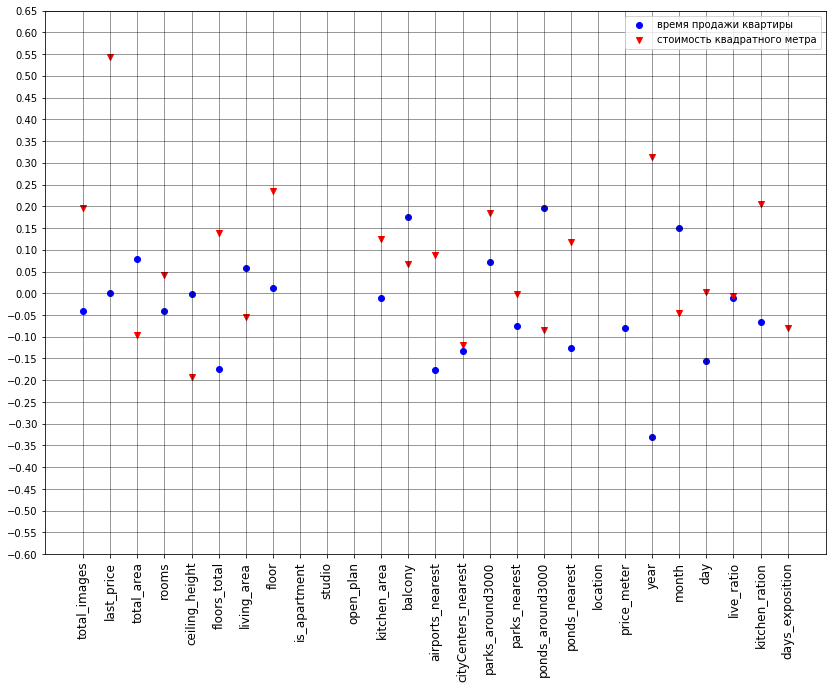

In [59]:
fig = plt.figure(figsize = (14,10))
ax  = fig.add_subplot(111)   


ax.scatter(data_publ.index , data_publ , label = 'время продажи квартиры'     , color = 'blue',  marker='o' )
ax.scatter(data_price.index, data_price, label = 'стоимость квадратного метра', color = 'red' ,  marker='v' )

ax.set_yticks(np.arange(-0.6, 0.7, 0.05))

ax.legend(loc = 'upper right', frameon = True) 

ax.grid(True , which = 'major', color = 'k', linestyle = 'solid', alpha = 0.5)

for label in ax.xaxis.get_ticklabels():
    label.set_color('black')
    label.set_rotation(90)
    label.set_fontsize(12)
    
plt.show()


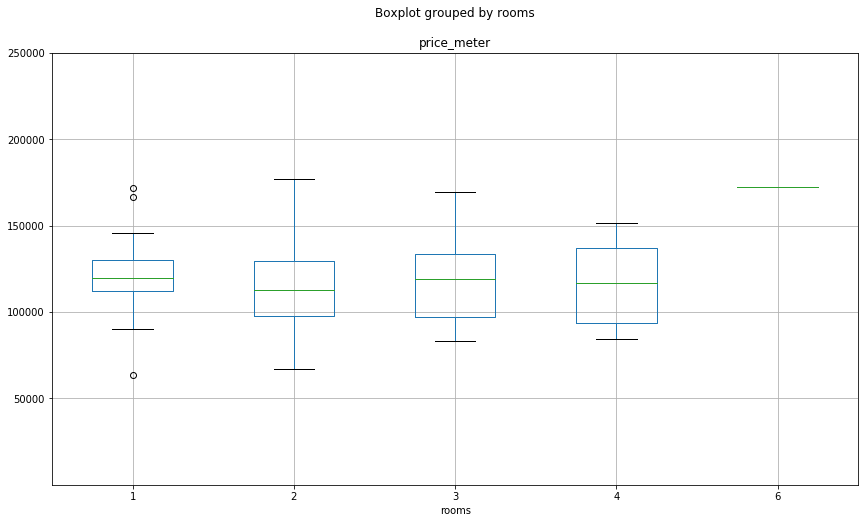

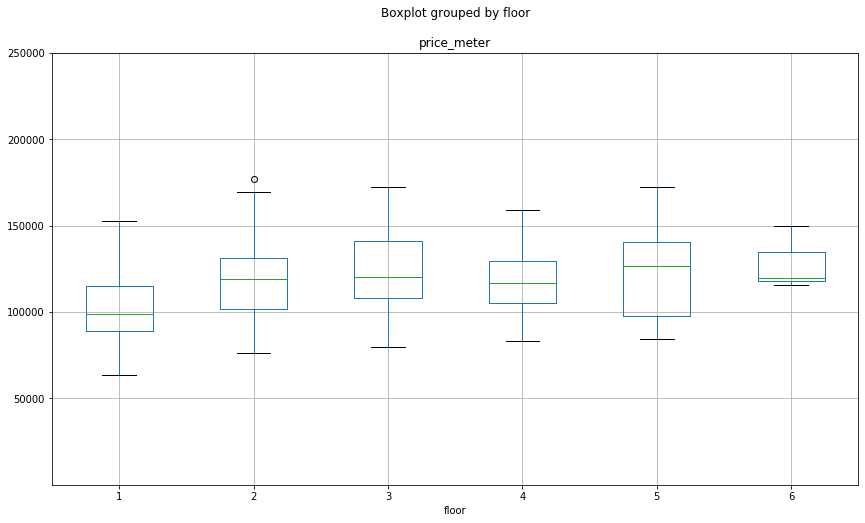

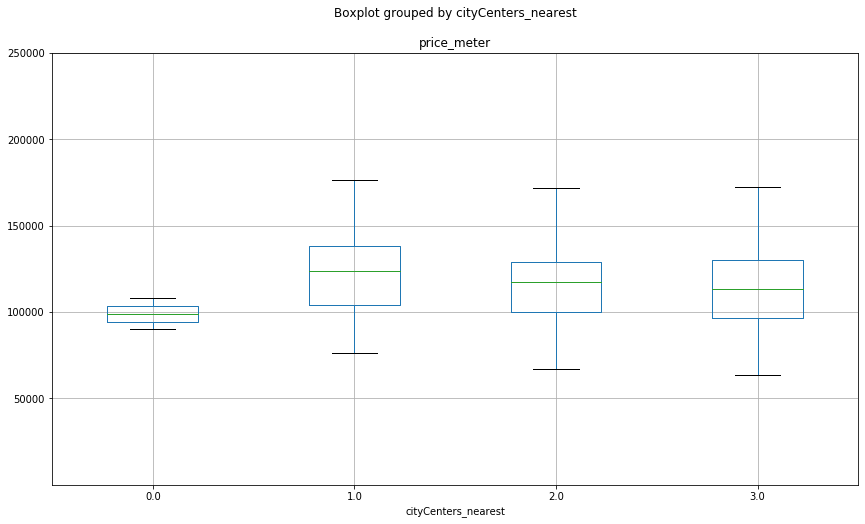

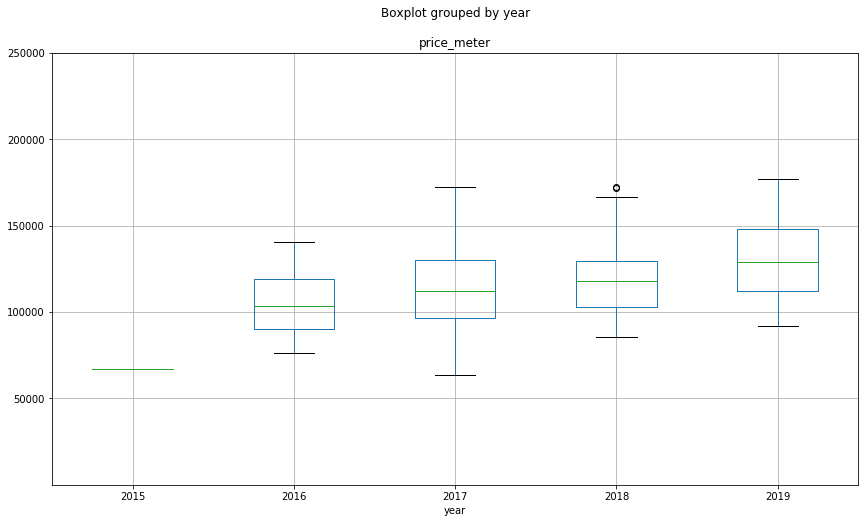

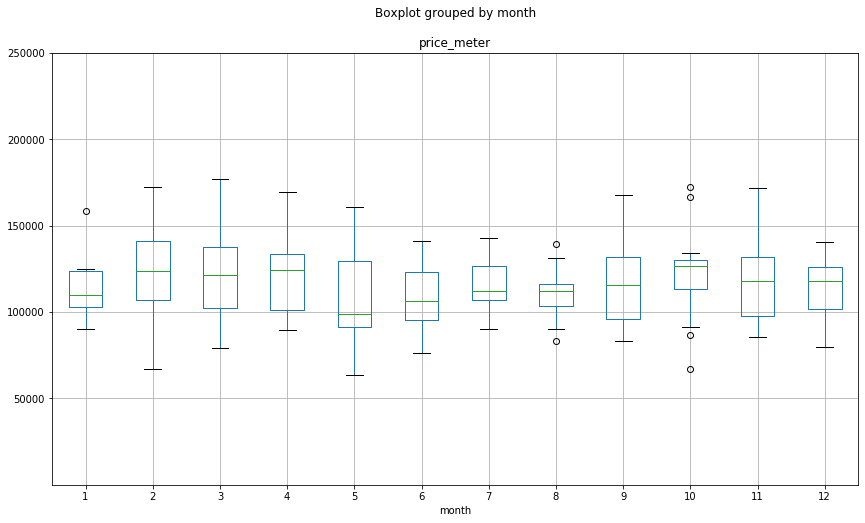

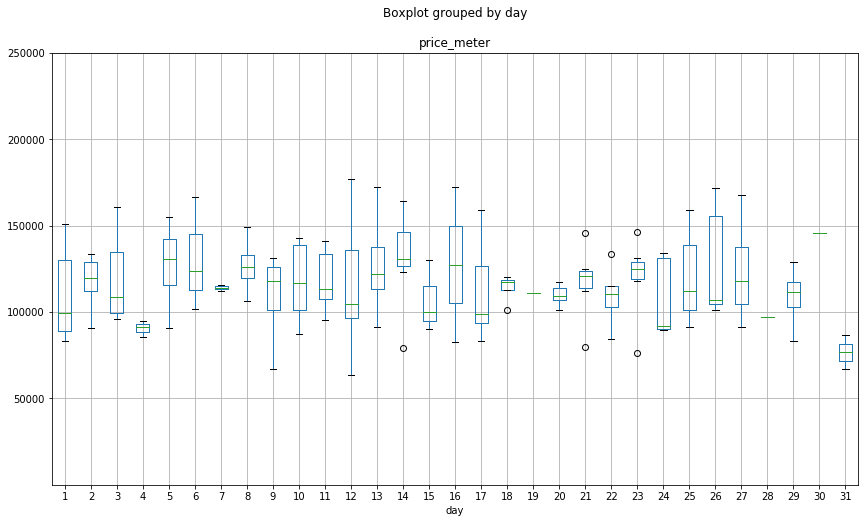

In [60]:
col_list = ['rooms', 'floor', 'cityCenters_nearest', 'year','month', 'day']


for col in col_list:
    df_center.boxplot(column = ['price_meter'], by = col, figsize = (14,8))
    plt.ylim(1, 250000)


**Вывод:** В центре города: 1 - трехкомнатные квартиры стоят дороже всех остальных, 2 - квартиры на высоких этажах стоят дороже, 3 - чем ближе к центру тем дороже, 4 - в 2019 году цены больше чем в другие годы, 5- в феврале квартиры продавались дороже, 6 - 16 числа каждого месяца квартиры продавались дороже.

## Общий вывод

Выполнив анализ данных можно сделать несколько следующих выводов:
1. На стоимость квартир в большей степени влияют площадь и местоположение, кроме того люди хотят иметь возможность быстро добраться до центра города, что также увеличивает общую стоимость квартиры.
2. Для квартир, которые расположены в центре Санкт-Петербурга, особую роль дополнительно играет факт наличия рядом парков и этажность (более высокие этажи стоят дороже).
3. Можно заметить, что цены на квартиры постепенно растут.
4. При грубой фильтрации, есть риск потерять часть полезных данных и получить некорректные результаты, что например проявилось при определении средней стоимости одного квадратного метра в центре города.    